<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/0115%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#https://drive.google.com/drive/folders/1s9Dbi_swf439G420R0FRXILlqaGWR7CK?usp=drive_link
df = pd.read_csv('titanic.csv')
df.head(3) #印出前三筆資料

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#印出年齡 (Age) 1.眾數; 2. 中位數; 3. 25%四分位數; 4. 平均數; 5. 變異數; 6. 標準差
print('1. 眾數: ', df['Age'].mode())
print('2. 中位數: ', df['Age'].median())
print('3. 25%四分位數: ', df['Age'].quantile(q=0.25))
print('4. 平均數: ', df['Age'].mean())
print('5. 變異數: ', df['Age'].var())
print('6. 標準差: ', df['Age'].std())

1. 眾數:  0    24.0
Name: Age, dtype: float64
2. 中位數:  28.0
3. 25%四分位數:  20.125
4. 平均數:  29.69911764705882
5. 變異數:  211.01912474630802
6. 標準差:  14.526497332334042


In [ ]:
#進階的資料呈現, 作業擴充部分, 可選擇
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 0:死亡 1:存活 pd.value_counts:個數
print(df['Survived'].value_counts())
# 常態分配(normalize):算出分配的百分比
print(df['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [ ]:
# 個數,百分比資料報表
# normalize 資料正規化
# pd.concat將不同的資料組合起來， axes (軸):選擇其中1個作為主軸
pd.concat([df['Survived'].value_counts(), df['Survived'].value_counts(normalize=True)], axis=1, keys=['個數','百分比'])

,個數,百分比
0,549,0.616162
1,342,0.383838


In [ ]:
# 個數+百分比
# 平均值+標準差

# 刪除不需要的欄位(旅客編號、姓名、票、 艙)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
#遺漏值 (缺失) 的檢查(空值加總)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

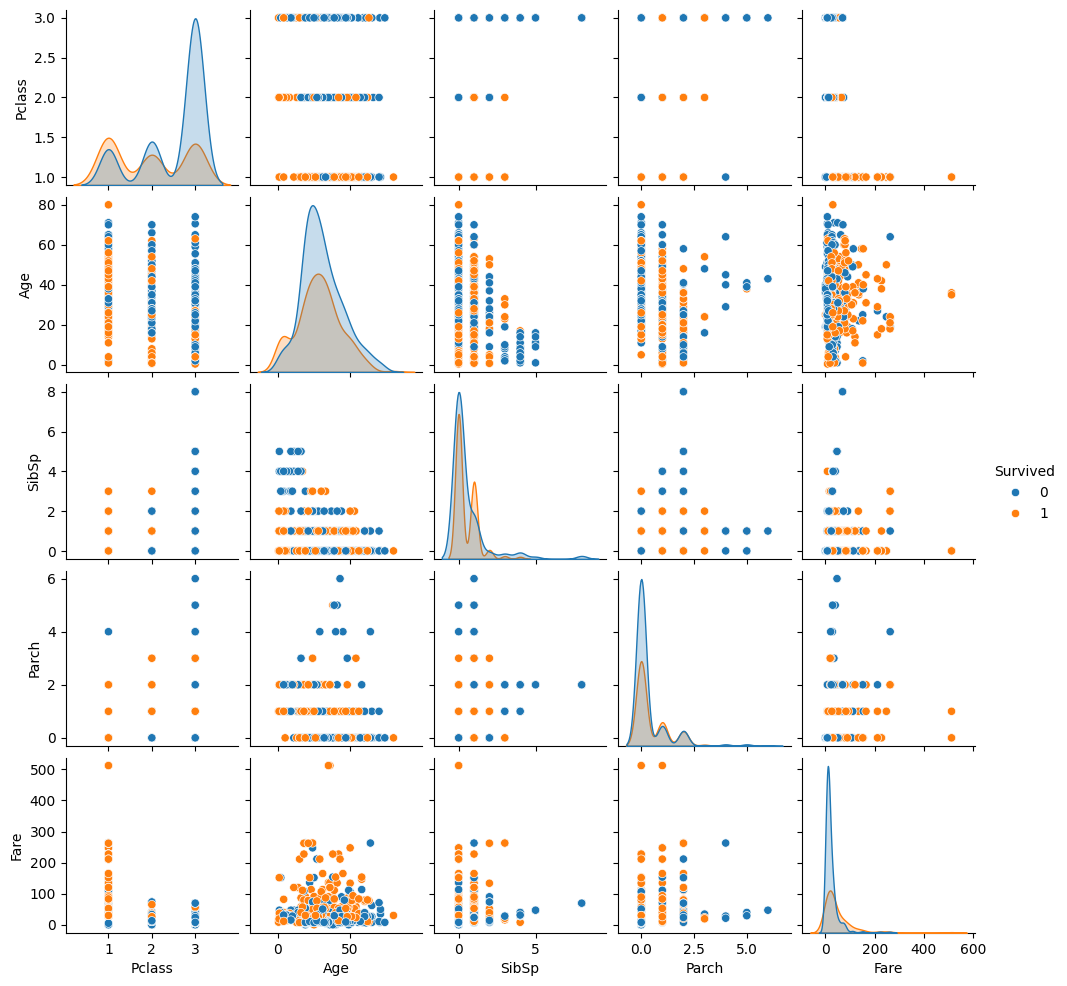

In [ ]:
#分析甚麼因素導致死亡
#印出欄位之間的配對圖 (pairplot)
import matplotlib.pyplot as plt
import seaborn as sns
# hue分析的基礎欄位 height活、死
sns.pairplot(data=df, hue='Survived', height=2)

<Axes: xlabel='Sex'>

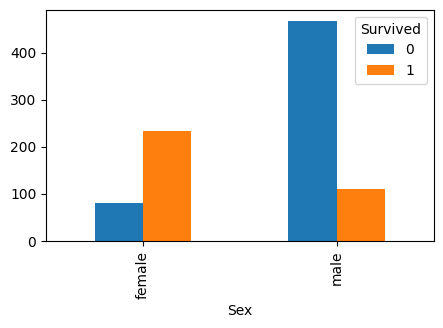

In [ ]:
#社會經濟分類 (Demography): 收入, 性別, 年齡
#性別跟船難存活的關係如何? unstack去除某些資料 bar(長條圖:資料大小(分類))
df.groupby('Sex')['Survived'].value_counts().unstack(1).plot(kind='bar', figsize=(5, 3))

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

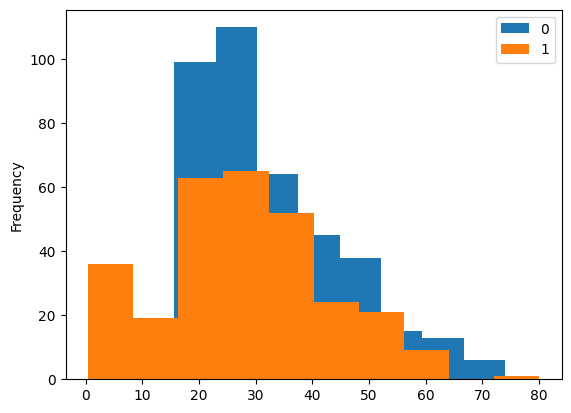

In [ ]:
#年齡跟船難存活的關係如何?hist長條圖 legend圖說 hist(直方圖:資料分布(數值))
df.groupby('Survived')['Age'].plot(kind='hist', legend=True)


In [ ]:
#下一步:將資料轉換到專門的統計分析工具,  SPSS, SAS, 或是 Python 統計套件等分析
#資料的預先處理
X_col_num = ['Age', 'SibSp', 'Parch', 'Fare'] #屬於數值型的欄位(fare:費用)
X_col_cat = ['Pclass', 'Sex', 'Embarked'] #屬於名稱分類型的欄位(pclass(艙等)、embarked(登岸港口))
X_cols = X_col_num + X_col_cat #所有欄位
y_col = 'Survived' #分析對象(是否存活)

In [ ]:
#資料的管道建立 - pipeline
# impute資料導入器，standard scalary (資料統整到一個範圍內)資料正規化
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# strategy(使用策略):median(大眾)
num_pl = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
# formatstring裡面資料要用大括弧包起來
print(f'數值型資料的欄位有:{X_col_num}')
num_pl.fit_transform(df[X_col_num])[:3]

數值型資料的欄位有:['Age', 'SibSp', 'Parch', 'Fare']


array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426]])